<a href="https://colab.research.google.com/github/tamojeetroychowdhury/Gaia-Data-Analysis/blob/main/Gaia_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 7.3 MB/s 
     |████████████████████████████████| 885 kB 49.3 MB/s 
     |████████████████████████████████| 48 kB 5.6 MB/s 
     |████████████████████████████████| 4.0 MB 69.0 MB/s 


In [2]:
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy.stats import gaussian_kde

In [ ]:
len(r)

2767

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


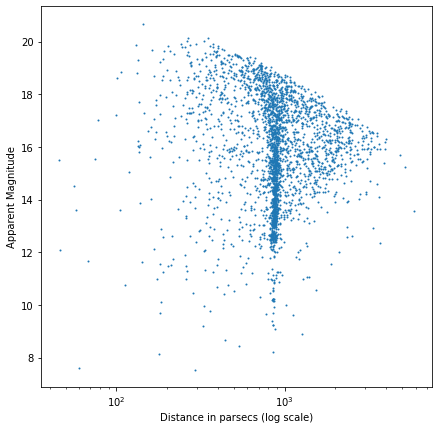

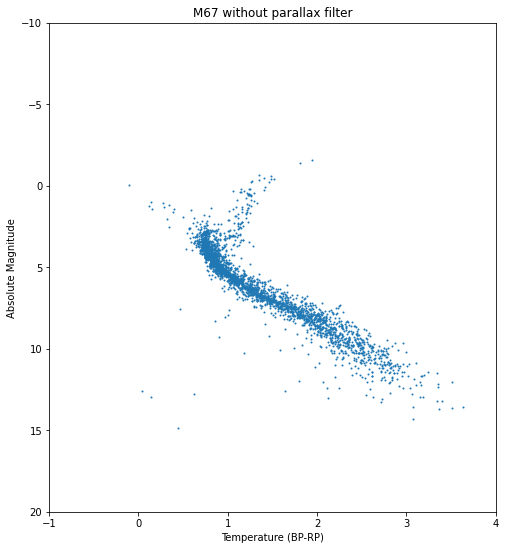

In [5]:
#M67
query = '''select top 10000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 132.3 and 133.3 and
g.dec between 11.3 and 12.3
and g.parallax_over_error > 5
order by g.parallax desc, comb desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))



plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']


plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('M67 without parallax filter')
plt.show()

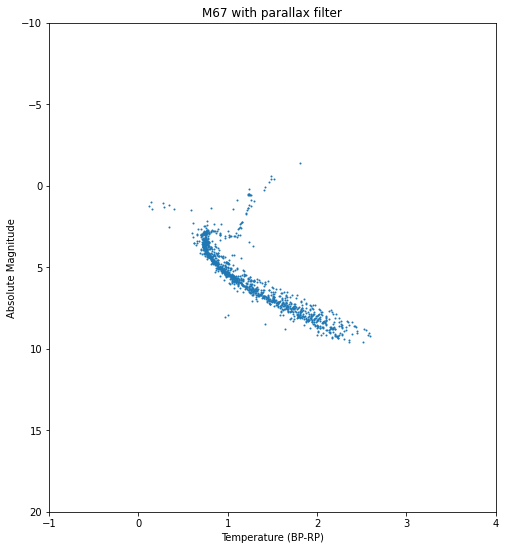

In [6]:
#r = r_m67
mask = r['parallax'] > 1
r1 = r[mask]
mask = r1['parallax'] < 1.33
r = r1[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('M67 with parallax filter')
plt.show()

In [7]:
r_m67 = r

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


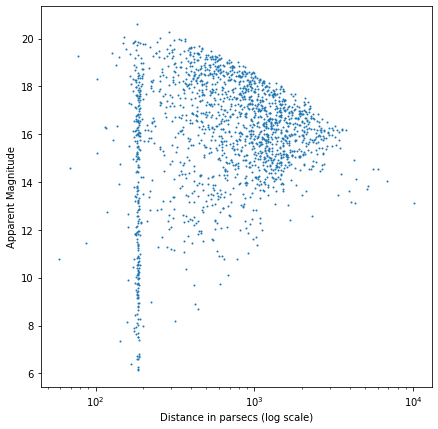

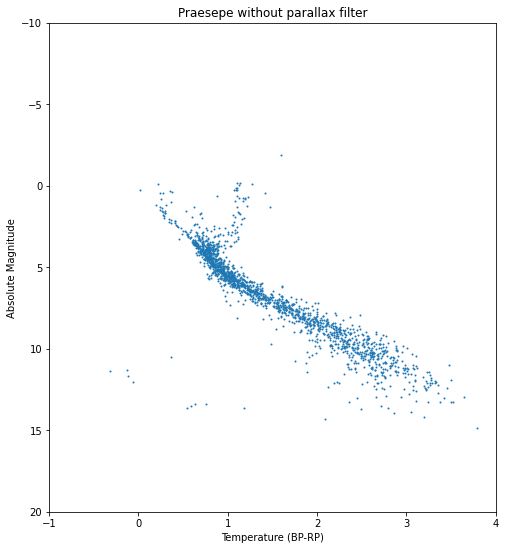

In [8]:
#Praesepe
query = '''select top 15000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 129.6 and 130.6 and
g.dec between 19.2 and 20.2 
and g.parallax_over_error > 5
order by comb desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Praesepe without parallax filter')
plt.show()

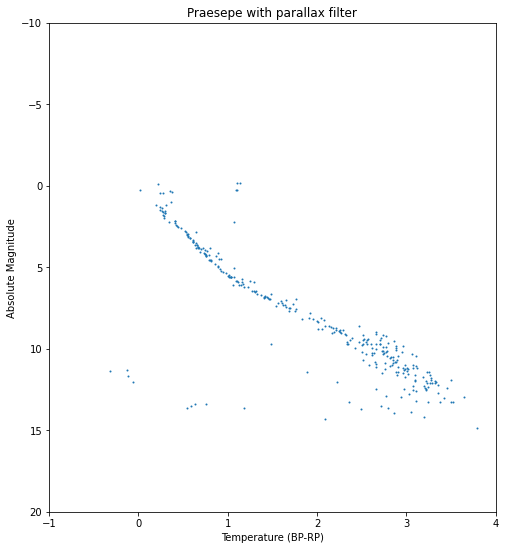

In [9]:
mask = r['parallax'] > 4
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Praesepe with parallax filter')
plt.show()

In [10]:
r_beehive = r

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


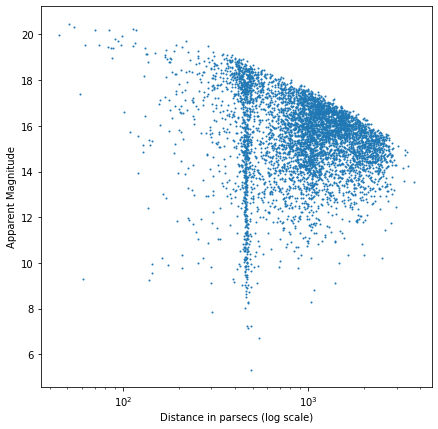

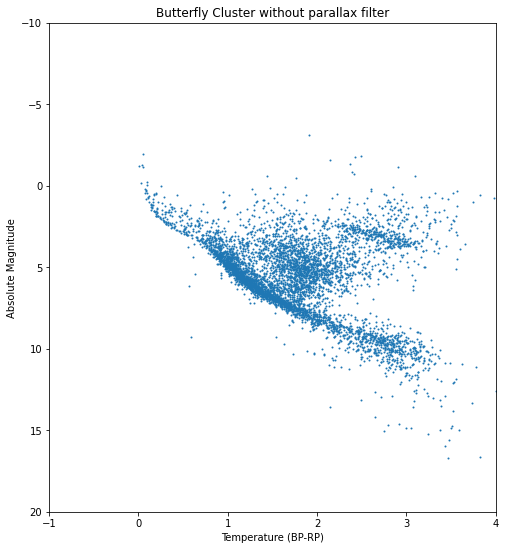

In [11]:
#M6 Butterfly Cluster
query = '''select top 10000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.teff_gspphot 
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 264.5 and 265.5 and
g.dec between -32.7 and -31.7 and
g.parallax_over_error > 10
order by g.parallax_over_error desc '''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Butterfly Cluster without parallax filter')
plt.show()

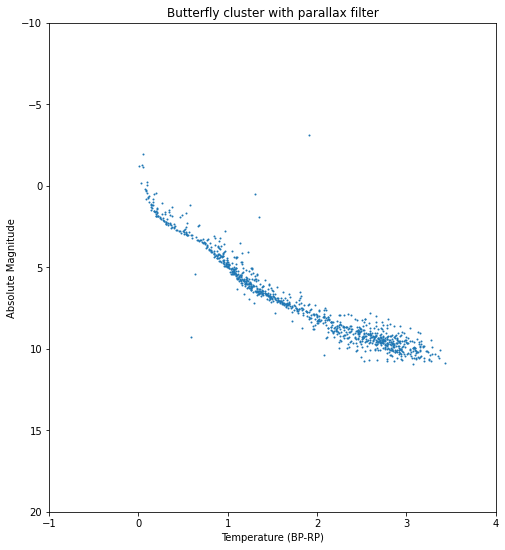

In [12]:
mask = r['parallax'] > 1.67
r = r[mask]
mask = r['parallax'] < 2.5
r = r[mask]


appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Butterfly cluster with parallax filter')
plt.show()

In [13]:
r_butterfly = r

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


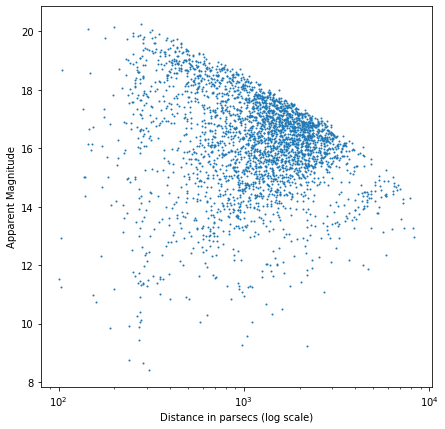

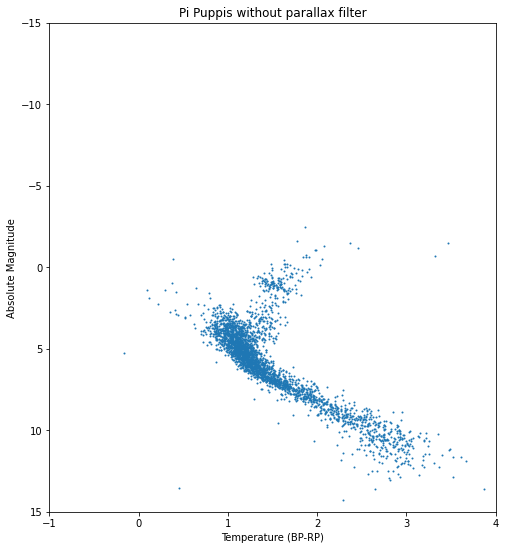

In [14]:
#Pi Puppis
query = '''select top 20000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 106.5 and 107.5 and
g.dec between -37.6 and -36.7 and
g.parallax_over_error > 8
order by g.parallax_over_error desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Pi Puppis without parallax filter')
plt.show()

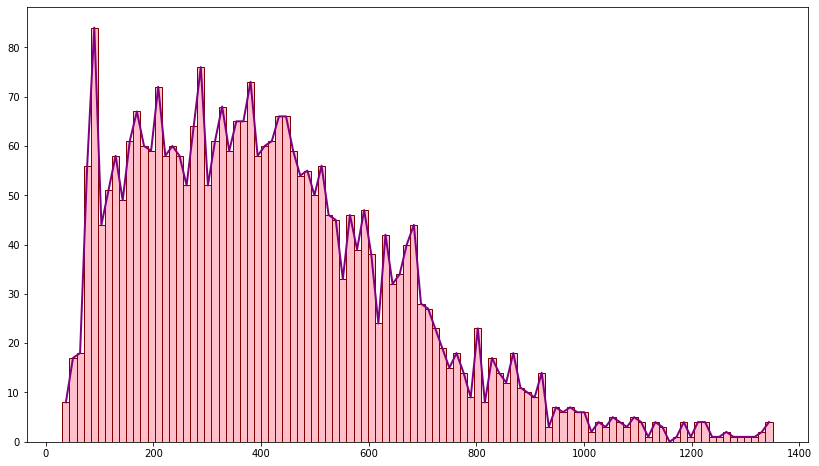

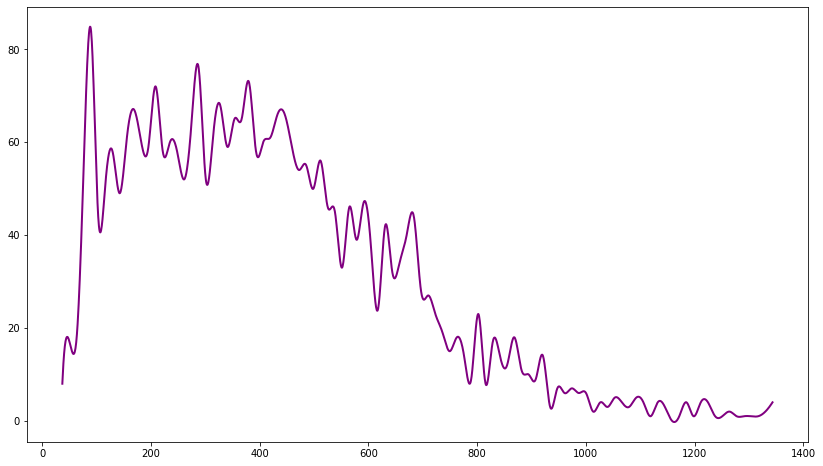

In [15]:
num = 100
from scipy import interpolate
plt.figure(figsize=(14,8))
n,bins,patches = plt.hist(np.sort(dist/3.26)[:3000], bins=num, color='pink', ec='maroon')

x = (bins[:num] + bins[1:])/2
x_new = np.linspace(x.min(), x.max(), 2000)
y = n

bspline = interpolate.make_interp_spline(x,y,)
y_new = bspline(x_new)
plt.plot((bins[:num]+bins[1:])/2,n,color='purple',linewidth = 2)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(x_new, y_new,color='purple',linewidth = 2)
plt.show()

In [16]:
len(r)

3059

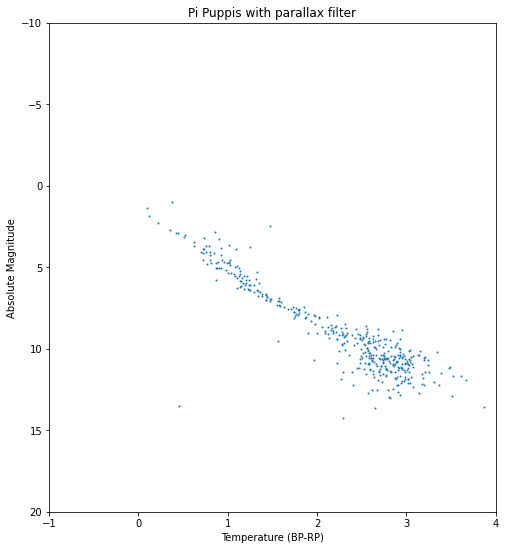

In [17]:
mask = r['parallax'] > 0.4
r = r[mask]

mask = r['parallax'] > 2
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Pi Puppis with parallax filter')
plt.show()

In [18]:
r_puppis = r

In [19]:
len(r)

410

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


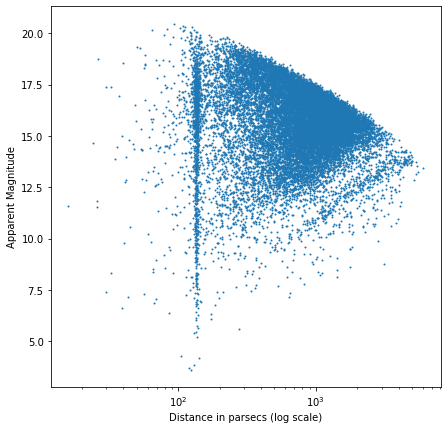

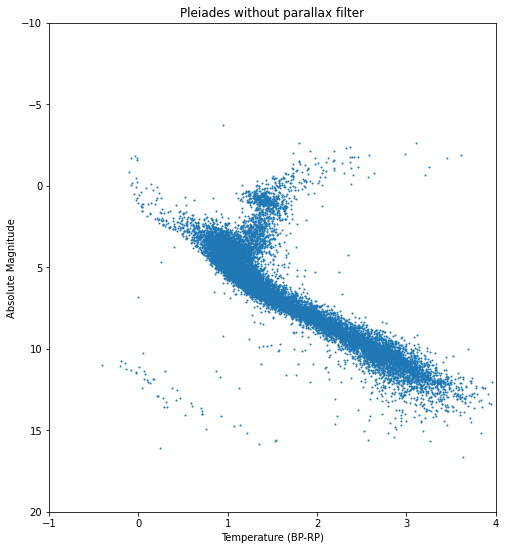

In [20]:
#PLEIADES
query = '''select top 20000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 54.6 and 58.6 and
g.dec between 22.2 and 26.2 and
g.parallax_over_error > 10 
order by g.parallax_over_error desc
'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Pleiades without parallax filter')
plt.show()

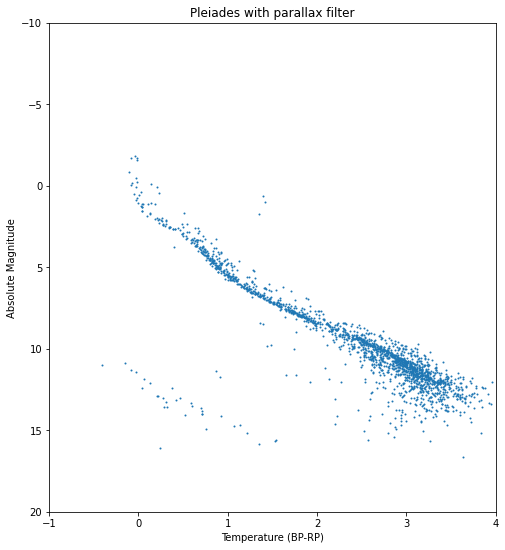

In [21]:
#r1 = r

mask = r['parallax'] > 5
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Pleiades with parallax filter')
plt.show()

In [22]:
r_pleiades = r

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


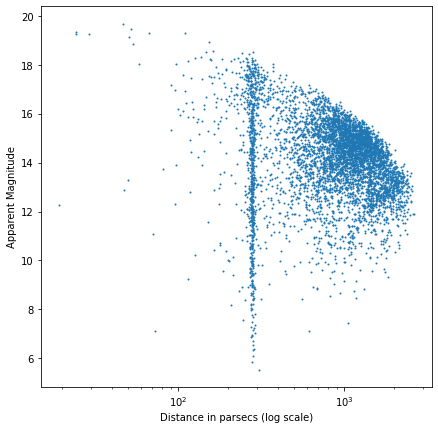

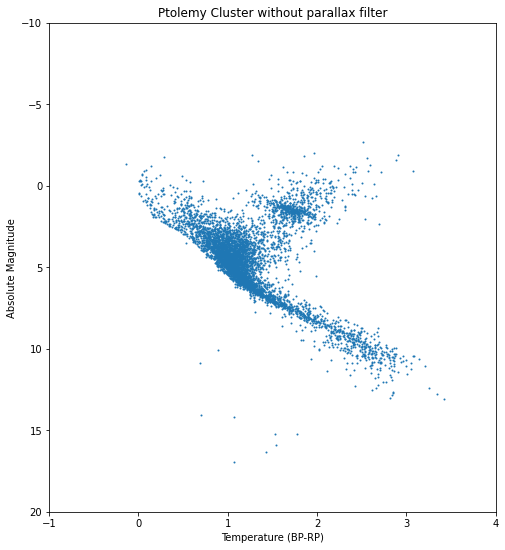

In [23]:
#Ptolemy
query = '''select top 50000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 267.8 and 269.2 and
g.dec between -35.5 and -34.1 
and g.parallax_over_error > 20
order by g.parallax_over_error desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Ptolemy Cluster without parallax filter')
plt.show()

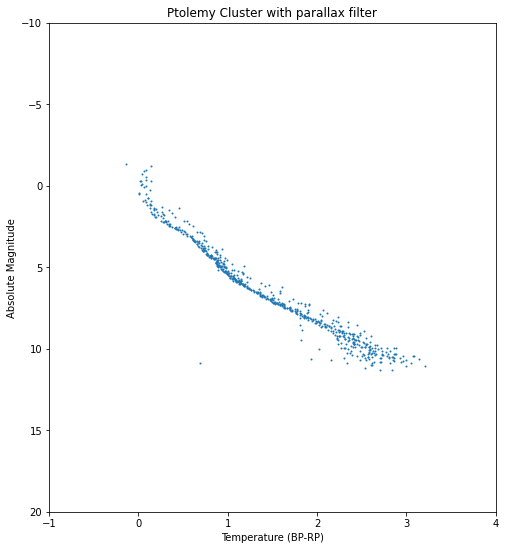

In [24]:
mask = r['parallax'] > 3.33
r = r[mask]
mask = r['parallax'] < 4
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Ptolemy Cluster with parallax filter')
plt.show()

In [25]:
r_ptolemy = r

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


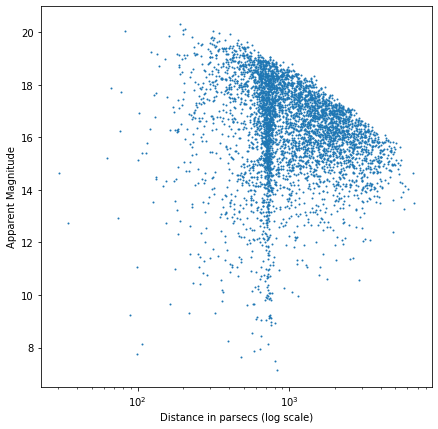

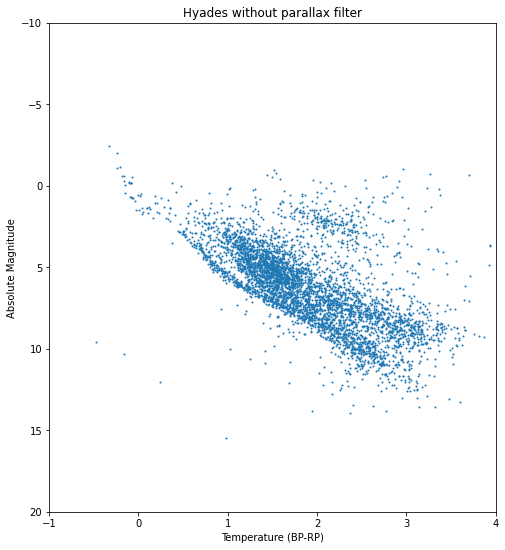

In [26]:
#Christmas Tree
query = '''select top 50000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 99.6 and 100.6 and
g.dec between 9.3 and 10.3 
and g.parallax_over_error > 5
order by g.parallax_over_error desc'''

job = Gaia.launch_job_async(query)
r_raw = job.get_results()
r=r_raw

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Hyades without parallax filter')
plt.show()

In [ ]:
len(r)

4758

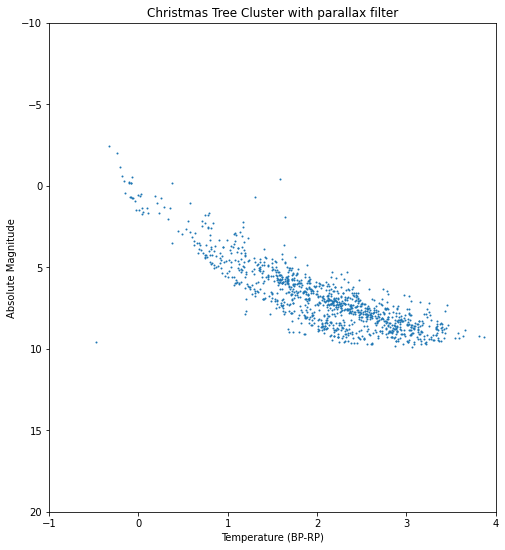

In [28]:
r=r_raw
mask = r['parallax'] > 1.2
r = r[mask]
mask = r['parallax'] < 1.5
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.vlines([0,0.25,0.6,0.9,1.4], -10,20,colors='g')
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Christmas Tree Cluster with parallax filter')
plt.show()

In [29]:
r_christmas = r

In [30]:
len(r_christmas)

1096

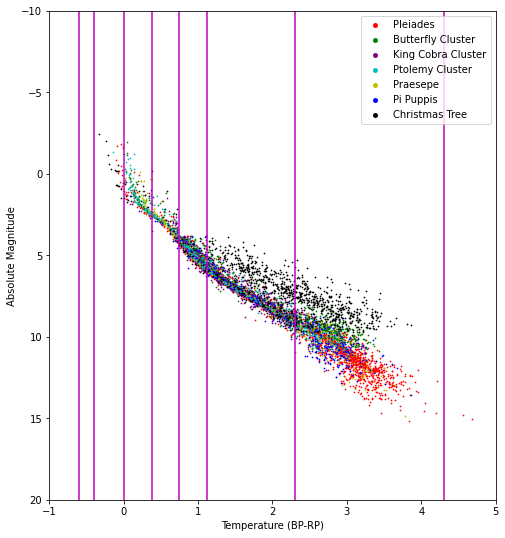

In [35]:
rlist = [r_pleiades, r_butterfly, r_m67,   r_ptolemy,r_beehive, r_puppis,r_christmas]
rgb=['r','g','purple','c','y','b','k']
names=['Pleiades','Butterfly Cluster', 'King Cobra Cluster','Ptolemy Cluster','Praesepe','Pi Puppis','Christmas Tree']

plt.figure(figsize=(8,9))
for i in range(len(rlist)):
  r = mainseq(rlist[i])
  appmags = r['phot_g_mean_mag']
  dist = 1000*np.reciprocal(r['parallax'])
  abmags = appmags + 5 - 5*np.log10(dist)
  #temps = r['teff_gspphot']
  g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
  plt.scatter(g,abmags,s=0.5,c=rgb[i], label=names[i])

plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,5)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
lgnd = plt.legend(scatterpoints = 1)
for i in lgnd.legendHandles:
  i.set_sizes([15.0])
plt.vlines([-0.6,-0.4,0,0.38,0.75,1.125,2.31,4.31], -10,20,colors='m')
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.show()



In [34]:
#run next two cells first

def spectral(r1):
  r = mainseq(r1)
  x = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
  mask1 = np.abs(x+0.5) <= 0.1
  o = r[mask1]
  mask2 = np.abs(x+0.2) <= 0.2
  b = r[mask2]
  mask3 = np.abs(x-0.19) <= 0.19
  a = r[mask3]
  mask4 = np.abs(x-0.56) <= 0.18
  f = r[mask4]
  mask5 = np.abs(x-0.94) <= 0.19
  g = r[mask5]
  mask6 = np.abs(x-1.72) <= 0.592
  k = r[mask6]
  mask7 = x > 2.31
  m = r[mask7]

  return [o,b,a,f,g,k,m]

In [32]:
from astropy.table import vstack

In [33]:
def giant(r):
  mask1 = (r['phot_g_mean_mag'] + 5 - 5*np.log10(1000*np.reciprocal(r['parallax']))) < 3.8
  r_ = r[mask1]
  mask2 = r_['phot_bp_mean_mag'] - r_['phot_rp_mean_mag'] > 0.72
  r_giant = r_[mask2]
  return r_giant


def hotblue(r):
  mask1 = (r['phot_g_mean_mag'] + 5 - 5*np.log10(1000*np.reciprocal(r['parallax']))) < 3.8
  r_ = r[mask1]
  mask2 = r_['phot_bp_mean_mag'] - r_['phot_rp_mean_mag'] < 0.72
  r1 = r_[mask2]
  y = (r1['phot_g_mean_mag'] + 5 - 5*np.log10(1000*np.reciprocal(r1['parallax'])))
  x = r1['phot_bp_mean_mag'] - r1['phot_g_mean_mag']
  mask3 = y < 5*x + 5
  r_blue = r1[mask3]
  return r_blue


def mainseq(r):
  mask1 = (r['phot_g_mean_mag'] + 5 - 5*np.log10(1000*np.reciprocal(r['parallax']))) > 3.8
  r1 = r[mask1]
  y = (r1['phot_g_mean_mag'] + 5 - 5*np.log10(1000*np.reciprocal(r1['parallax'])))
  x = r1['phot_bp_mean_mag'] - r1['phot_g_mean_mag']
  mask3 = y < 5*x + 5
  r_main = r1[mask3]
  return vstack([r_main, hotblue(r)])

def white(r):
  y = (r['phot_g_mean_mag'] + 5 - 5*np.log10(1000*np.reciprocal(r['parallax'])))
  x = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
  mask3 = y > 5*x + 5
  r_white = r[mask3]
  return r_white

def lentypes(r):
  t = [len(giant(r)), len(hotblue(r)), len(mainseq(r)), len(white(r)), len(r)]
  return t

def fracs(r):
  t = lentypes(r)
  percents = [t[i]/t[4]*100 for i in range(4)]
  return percents

1125
587
799
466
247
591


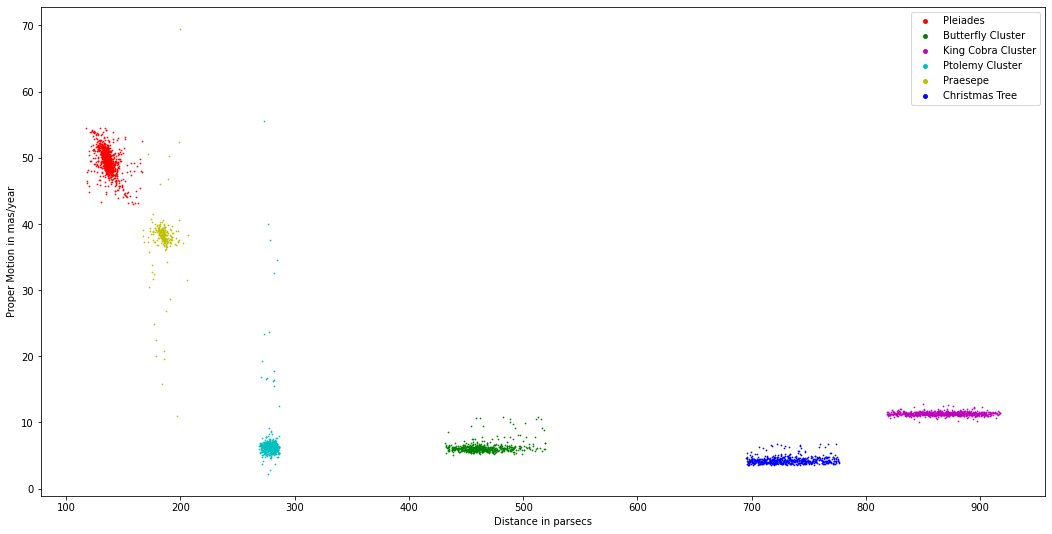

In [36]:
n=1

rlist = [r_pleiades, r_butterfly, r_m67,   r_ptolemy,r_beehive, r_christmas]
rgb=['r','g','m','c','y','b']
names=['Pleiades','Butterfly Cluster', 'King Cobra Cluster','Ptolemy Cluster','Praesepe','Christmas Tree']


cleaned = []
plt.figure(figsize=(18,9))
for i in range(len(rlist)):
  r = rlist[i]
  appmags = r['phot_g_mean_mag']
  
  pm = r['pm']
  meanpm = np.mean(pm)
  stdpm = np.std(pm)
  mask = np.abs(r['pm'] - meanpm) < max(n*stdpm, 50)
  r=r[mask]
  
  dist = 1000*np.reciprocal(r['parallax'])
  meandist = np.mean(dist)
  stddist = np.std(dist)
  mask = np.abs(dist - meandist) < n*stddist
  r=r[mask]
  if len(r)>750:
    n1 = 0.5
    dist = 1000*np.reciprocal(r['parallax'])
    meandist = np.mean(dist)
    stddist = np.std(dist)
    mask = np.abs(dist - meandist) < 50
    r=r[mask]


  if len(r)>670:
    n1 = 0.5
    pm = r['pm']
    meanpm = np.mean(pm)
    stdpm = np.std(pm)
    mask = np.abs(r['pm'] - meanpm) < n1*stdpm
    r=r[mask]
  dist = 1000*np.reciprocal(r['parallax'])
  pm = r['pm']
  #abmags = appmags + 5 - 5*np.log10(dist)
  #temps = r['teff_gspphot']
  g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
  plt.scatter(dist, pm ,s=0.5,c=rgb[i], label=names[i])
  cleaned.append(r)
  print(len(r))



#plt.ylim(-10,20)
#plt.xlim(1000,30000)
#plt.xlim(-1,4)
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
#plt.xscale('log')
#plt.yscale('log')
lgnd = plt.legend(scatterpoints = 1)
for i in lgnd.legendHandles:
  i.set_sizes([15.0])
plt.xlabel('Distance in parsecs')
plt.ylabel('Proper Motion in mas/year')
plt.show()



1246
605
694
620
271
531


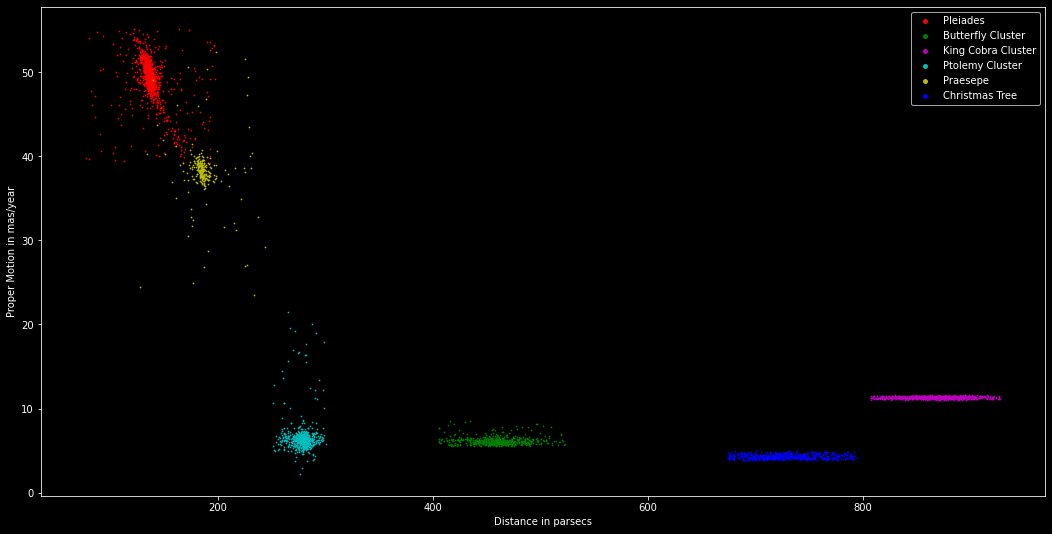

In [37]:
n=1
plt.style.use ('dark_background')
rlist = [r_pleiades, r_butterfly, r_m67,   r_ptolemy,r_beehive, r_christmas]
rgb=['r','g','m','c','y','b']
names=['Pleiades','Butterfly Cluster', 'King Cobra Cluster','Ptolemy Cluster','Praesepe','Christmas Tree']


cleaned = []
plt.figure(figsize=(18,9))
for i in range(len(rlist)):
  r = rlist[i]
  appmags = r['phot_g_mean_mag']
  
  pm = r['pm']
  mean = np.mean(pm)
  std = np.std(pm)
  mask = np.abs(r['pm'] - mean) < n*std
  
  r=r[mask]
  if len(r)>700:
    n1 = 0.5
    pm = r['pm']
    mean = np.mean(pm)
    std = np.std(pm)
    mask = r['pm'] > mean - n1*std
    r=r[mask]
    mask = r['pm'] < mean + n1*std
    r=r[mask]
  dist = 1000*np.reciprocal(r['parallax'])

  meandist = np.mean(dist)
  stddist = np.std(dist)
  mask = np.abs(dist - meandist) < max(stddist, 60)
  r = r[mask]
  dist = 1000*np.reciprocal(r['parallax'])
  pm = r['pm']
  #abmags = appmags + 5 - 5*np.log10(dist)
  #temps = r['teff_gspphot']
  g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
  plt.scatter(dist, pm ,s=0.5,c=rgb[i], label=names[i])
  cleaned.append(r)
  print(len(r))



#plt.ylim(-10,20)
#plt.xlim(1000,30000)
#plt.xlim(-1,4)
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
#plt.xscale('log')
#plt.yscale('log')
lgnd = plt.legend(scatterpoints = 1)
for i in lgnd.legendHandles:
  i.set_sizes([15.0])
plt.xlabel('Distance in parsecs')
plt.ylabel('Proper Motion in mas/year')
plt.show()



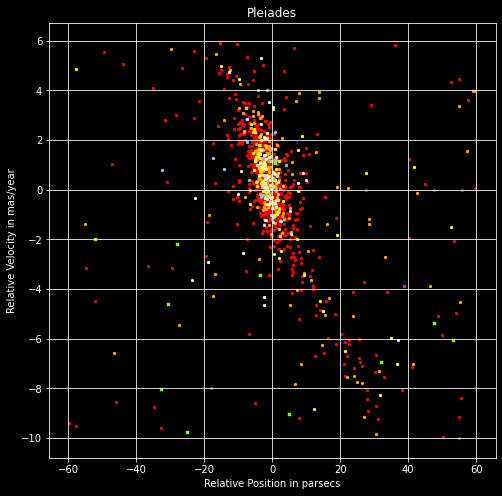

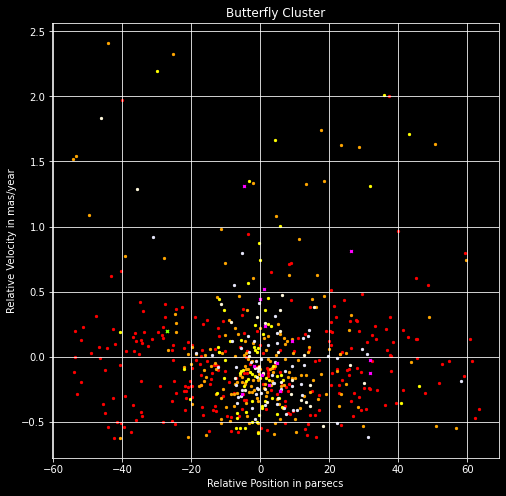

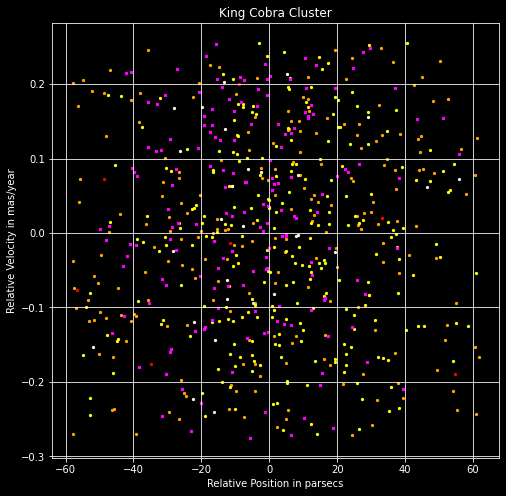

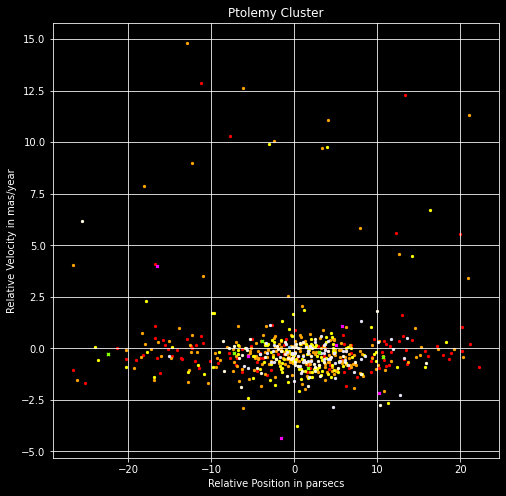

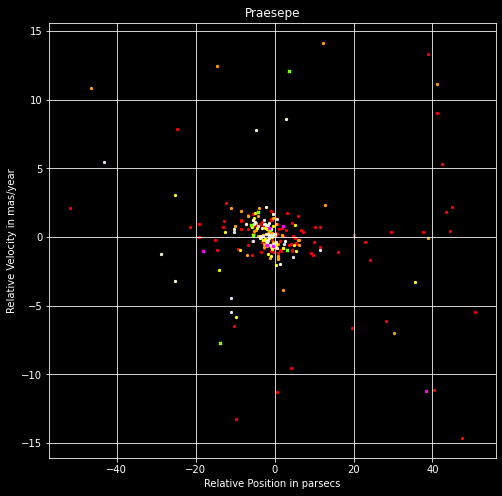

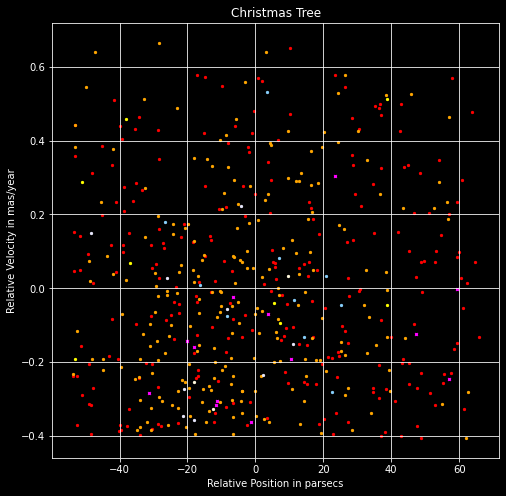

In [38]:
'''Highest distance difference due to RA, Dec was about 2-3 parsec, which has almost no effect on the relative distance from center of cluster'''

rlist = [r_pleiades, r_butterfly, r_m67,   r_ptolemy,r_beehive, r_christmas]
speccol = ['cornflowerblue', 'lightskyblue','lavender','cornsilk','yellow','orange','red']
names=['Pleiades','Butterfly Cluster', 'King Cobra Cluster','Ptolemy Cluster','Praesepe','Christmas Tree']

#cleaned = list(rlist)

plt.style.use('dark_background')

for i in range(len(cleaned)):
  plt.figure(figsize=(8,8))
  #plt.vlines([0],-1000,1000,colors='forestgreen')
  #plt.hlines([0],-1000,1000,colors='forestgreen')
  s = cleaned[i]
  specs = spectral(cleaned[i])
  meanv = np.mean(cleaned[i]['pm'])
  dist = 1000*np.reciprocal(s['parallax'])
  meanr = np.mean(dist)
  for j in range(-1,-len(specs)-1,-1):
    r = specs[j]
    relv = r['pm'] - meanv
    dist = 1000*np.reciprocal(r['parallax'])
    relr = dist - meanr
    plt.scatter(relr, relv,s=5,c=speccol[j])
  
  r = white(s)
  #print(len(r))
  relv = r['pm'] - meanv
  dist = 1000*np.reciprocal(r['parallax'])
  relr = dist - meanr
  plt.scatter(relr, relv,s=9,marker = 'x',c='chartreuse')

  r = giant(s)
  #print(len(r))
  relv = r['pm'] - meanv
  dist = 1000*np.reciprocal(r['parallax'])
  relr = dist - meanr
  plt.scatter(relr, relv,s=7,marker = 'x',c='fuchsia')
  plt.xlabel('Relative Position in parsecs')
  plt.ylabel('Relative Velocity in mas/year')
  #plt.xlim(-60,60)
  plt.title(names[i])
  plt.grid()
  print()




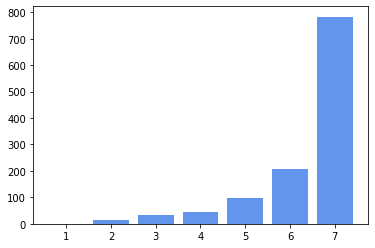

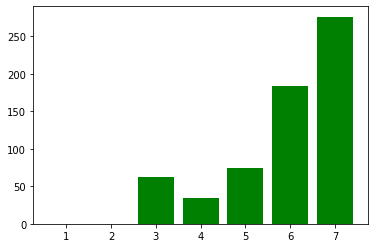

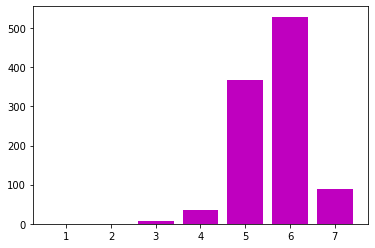

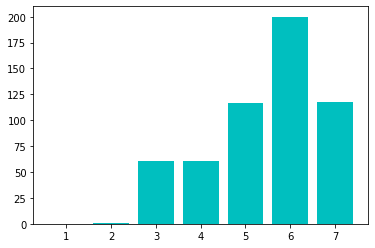

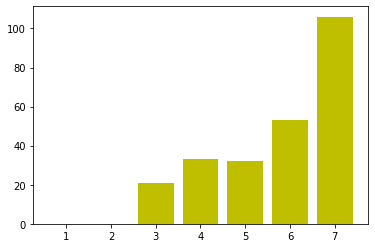

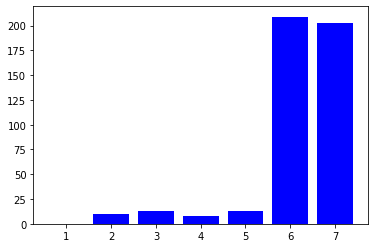

In [ ]:
rlist = [r_pleiades, r_butterfly, r_m67,   r_ptolemy,r_beehive, r_christmas]
rgb=['cornflowerblue','g','m','c','y','b']
names=['Pleiades','Butterfly Cluster', 'King Cobra Cluster','Ptolemy Cluster','Praesepe','Pi Puppis']

#plt.figure(figsize=(8,9))
for i in range(len(cleaned)):
  r = cleaned[i]
  plt.bar([1,2,3,4,5,6,7],[len(j) for j in spectral(r)],color=rgb[i], label=names[i])
  plt.show()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


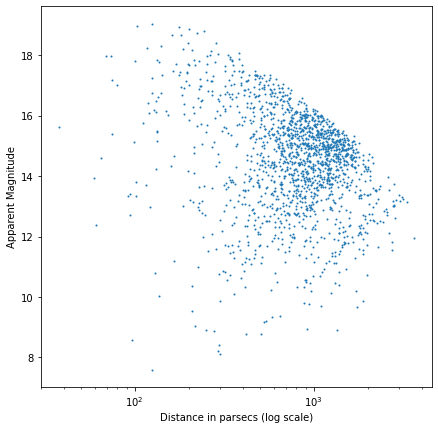

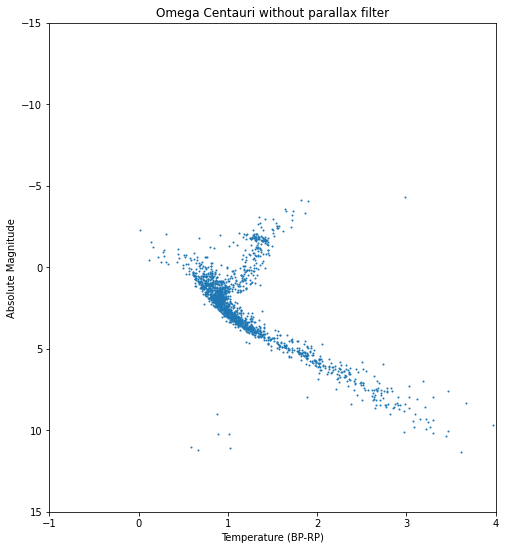

In [ ]:
#Omega Centauri
query = '''SELECT TOP 50000 g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.pm, h.teff_gspphot, DISTANCE(
POINT(201.7, -47.48),
POINT(g.ra, g.dec)) AS ang_sep
FROM gaiadr3.gaia_source AS g, gaiadr3.astrophysical_parameters AS h
WHERE 1 = CONTAINS(
POINT(201.7, -47.48),
CIRCLE(ra, dec, 0.6))
AND g.source_id = h.source_id
AND g.parallax > 0
AND g.parallax_over_error > 20
ORDER BY ang_sep ASC'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri without parallax filter')
plt.show()

In [ ]:
len(r)

1660

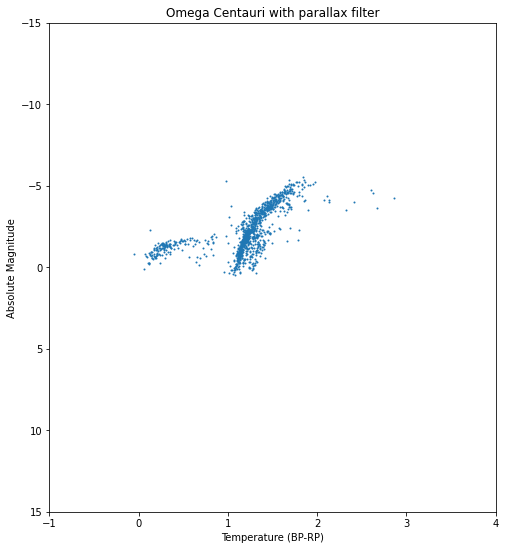

In [ ]:
mask = r['parallax'] > 0.18
r = r[mask]

mask = r['parallax'] < 0.25
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 3.26*1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri with parallax filter')
plt.show()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


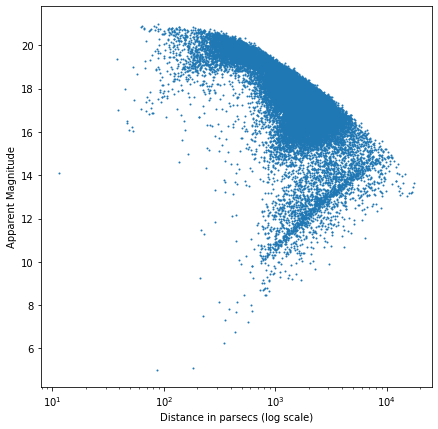

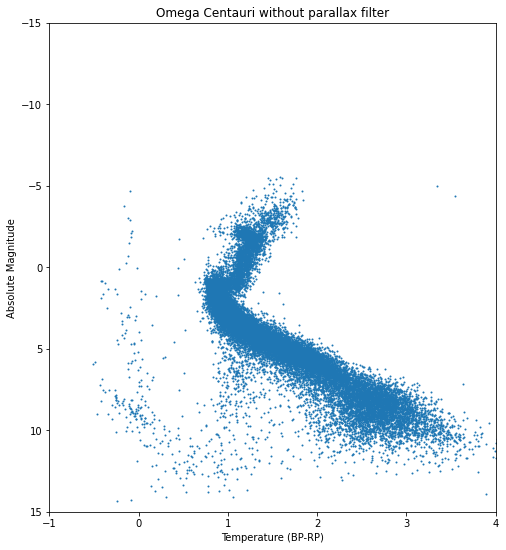

In [ ]:
#LMC
query = '''select top 30000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, 
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 85 and 95 and
g.dec between -74 and -64
and g.parallax_over_error > 5
order by comb desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 3.26*1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist/3.26, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri without parallax filter')
plt.show()

In [ ]:
len(r)

30000

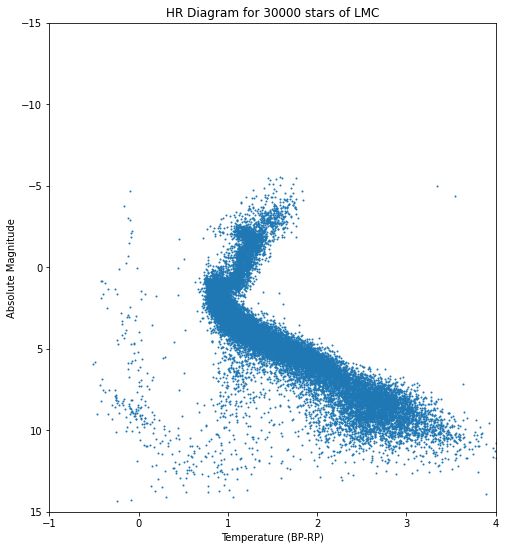

In [ ]:
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('HR Diagram for 30000 stars of LMC')
plt.show()